In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# Dosyanızı yükleyin
data = pd.read_csv("C:/Users/aziz-/Desktop/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_1627.csv", skiprows=4)

In [5]:
# Veri setinin ilk birkaç satırına bakalım
print(data.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code  1960  1961  1962  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   

   1963  1964  1965  ...      2015      2016      2017      2018      2019  \
0   NaN   NaN   NaN  ...       NaN       NaN       NaN       NaN       NaN   
1   NaN   NaN   NaN  ...  0.960430  0.941337  0.933874  0.921453  0.915294   
2   NaN 

In [9]:
data.shape

(266, 69)

In [13]:
data.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2020               27
2021              266
2022              266
2023              266
Unnamed: 68       266
Length: 69, dtype: int64

In [15]:
data.sum()

Country Name      ArubaAfrica Eastern and SouthernAfghanistanAfr...
Country Code      ABWAFEAFGAFWAGOALBANDARBAREARGARMASMATGAUSAUTA...
Indicator Name    CO2 emissions (metric tons per capita)CO2 emis...
Indicator Code    EN.ATM.CO2E.PCEN.ATM.CO2E.PCEN.ATM.CO2E.PCEN.A...
1960                                                            0.0
                                        ...                        
2020                                                     923.912786
2021                                                            0.0
2022                                                            0.0
2023                                                            0.0
Unnamed: 68                                                     0.0
Length: 69, dtype: object

In [17]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

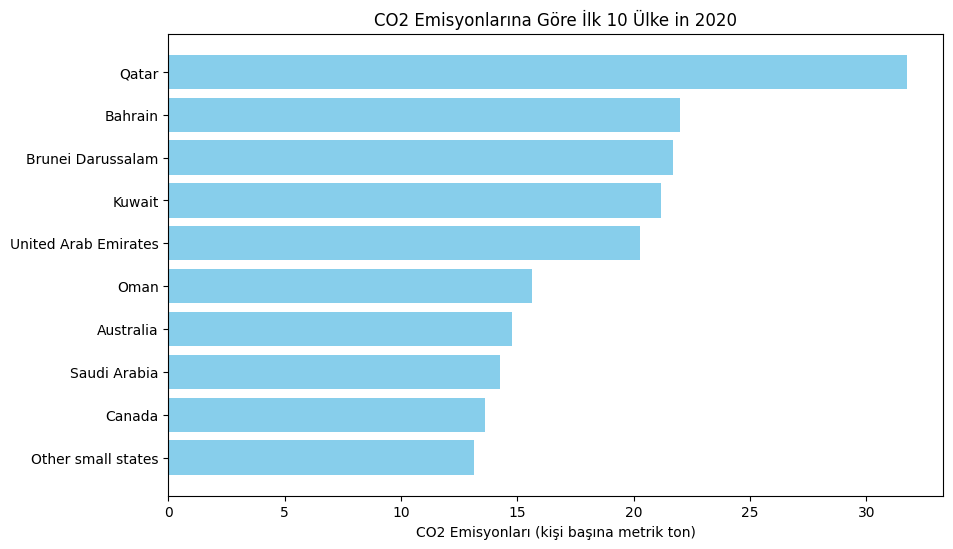

In [25]:
# 2020 yılındaki CO2 emisyonlarına bakalım (en güncel yıl)
year = '2020'
data_2020 = data[['Country Name', year]].dropna()  # Boş değerleri çıkarıyoruz

# Emisyon verisine göre en yüksek 10 ülkeyi seçelim
top_10_countries = data_2020.nlargest(10, year)

# Bar grafiğini çizelim
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['Country Name'], top_10_countries[year], color='skyblue')
plt.xlabel('CO2 Emisyonları (kişi başına metrik ton)')
plt.title(f'CO2 Emisyonlarına Göre İlk 10 Ülke in {year}')
plt.gca().invert_yaxis()  # En yüksek değeri en üstte göstermek için
plt.show()

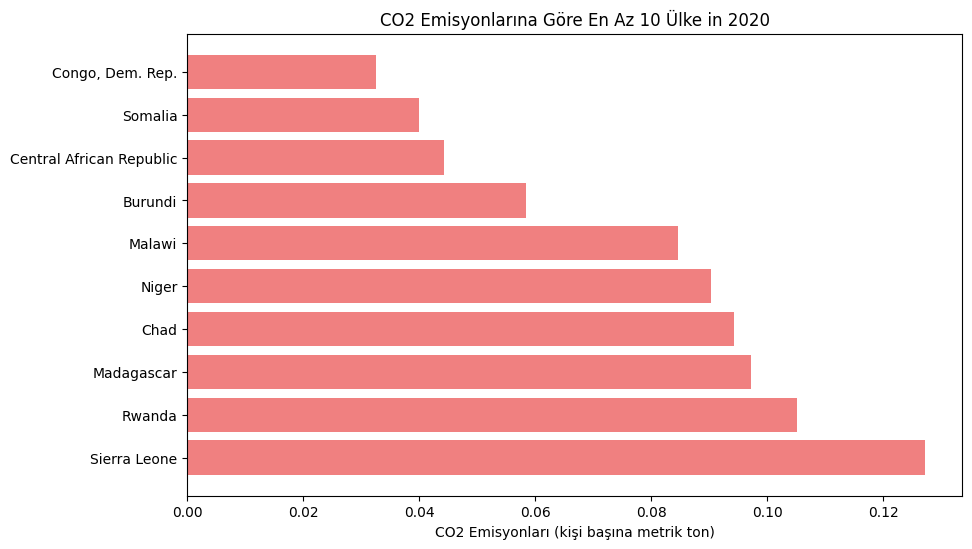

In [29]:
# En düşük 10 emisyona sahip ülkelere bakalım
bottom_10_countries = data_2020.nsmallest(10, year)

# Bar grafiğini çizelim
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_countries['Country Name'], bottom_10_countries[year], color='lightcoral')
plt.xlabel('CO2 Emisyonları (kişi başına metrik ton)')
plt.title(f'CO2 Emisyonlarına Göre En Az 10 Ülke in {year}')
plt.gca().invert_yaxis()  # En düşük değeri en üstte göstermek için
plt.show()


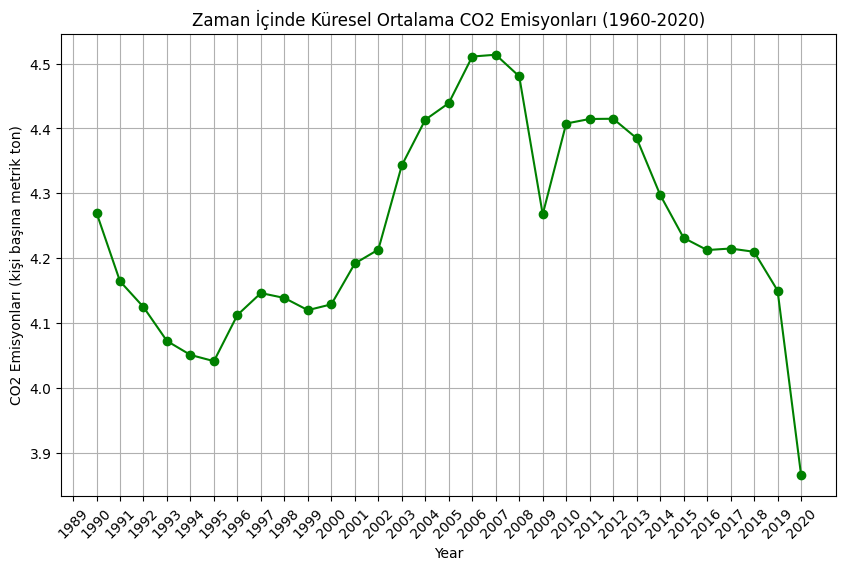

In [33]:
# Yıllara göre genel CO2 emisyonunu hesaplayalım (ortalama alarak)
years = [str(year) for year in range(1960, 2021)]
global_emissions = data[years].mean()

# Çizgi grafiğini çizelim
plt.figure(figsize=(10, 6))
plt.plot(years, global_emissions, marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('CO2 Emisyonları (kişi başına metrik ton)')
plt.title('Zaman İçinde Küresel Ortalama CO2 Emisyonları (1960-2020)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


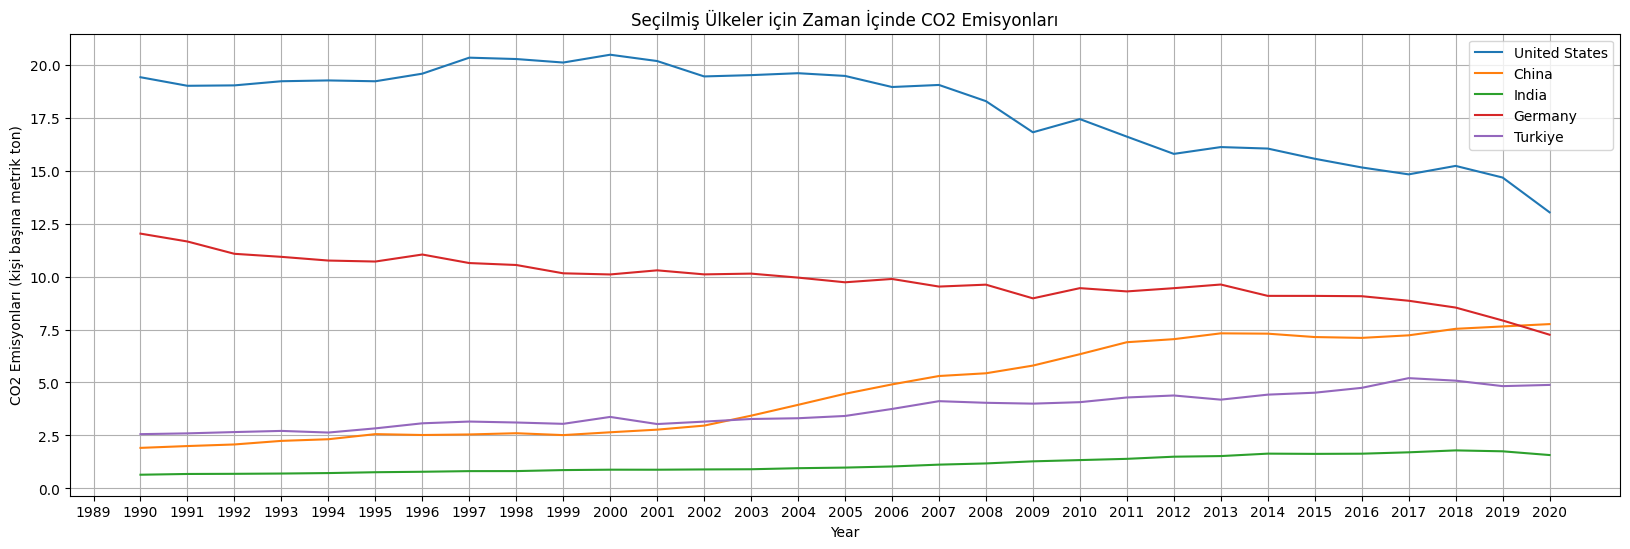

In [47]:
# Seçili ülkeler için veriyi alalım
selected_countries = ['United States', 'China', 'India', 'Germany', 'Turkiye']
country_data = data[data['Country Name'].isin(selected_countries)]

# Yıllara göre değişimi çizelim
plt.figure(figsize=(20, 6))
for country in selected_countries:
    plt.plot(years, country_data[country_data['Country Name'] == country][years].values.flatten(), label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emisyonları (kişi başına metrik ton)')
plt.title('Seçilmiş Ülkeler için Zaman İçinde CO2 Emisyonları')
plt.legend()
plt.grid(True)
plt.show()


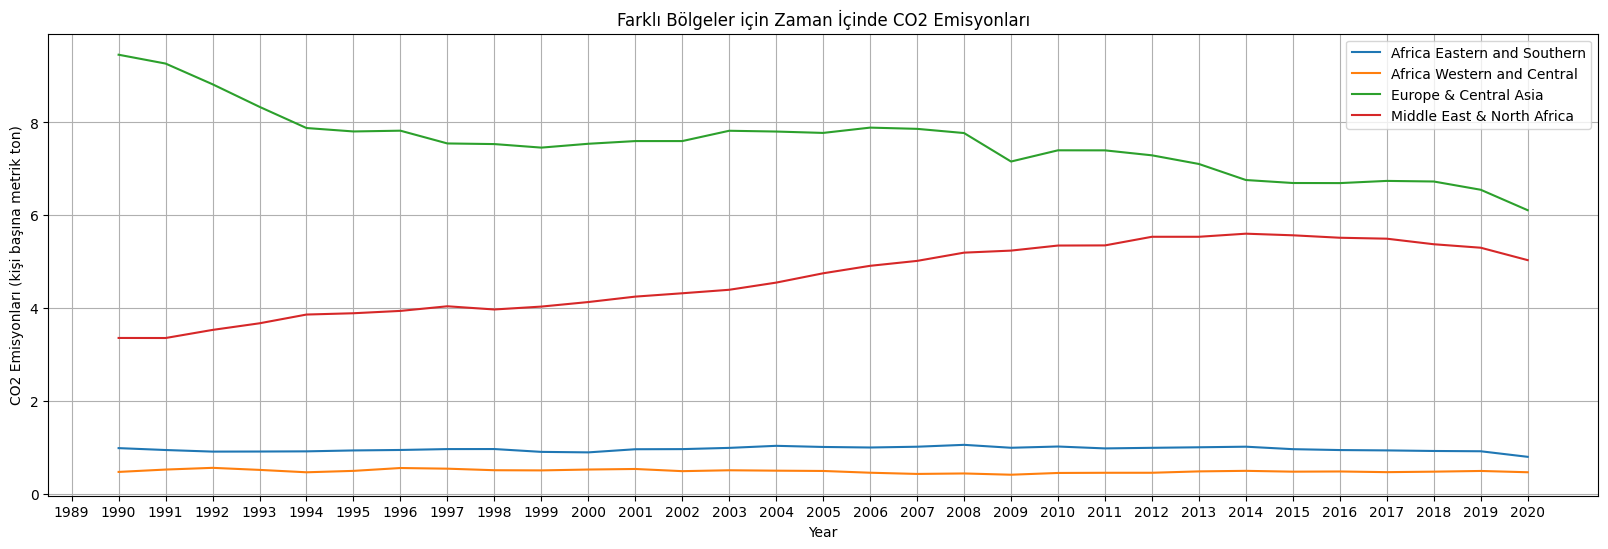

In [53]:
# Bölgeleri seçelim ve karşılaştıralım
regions = ['Africa Eastern and Southern', 'Africa Western and Central', 'Europe & Central Asia', 'Middle East & North Africa']
region_data = data[data['Country Name'].isin(regions)]

# Çizgi grafiğini çizelim
plt.figure(figsize=(20, 6))
for region in regions:
    plt.plot(years, region_data[region_data['Country Name'] == region][years].values.flatten(), label=region)

plt.xlabel('Year')
plt.ylabel('CO2 Emisyonları (kişi başına metrik ton)')
plt.title('Farklı Bölgeler için Zaman İçinde CO2 Emisyonları')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Boyutları kontrol edelim
print(f"Years length: {len(years)}")
print(f"Global emissions length: {len(global_emissions)}")
print(f"Yearly change length: {len(yearly_change)}")


Years length: 61
Global emissions length: 61
Yearly change length: 30


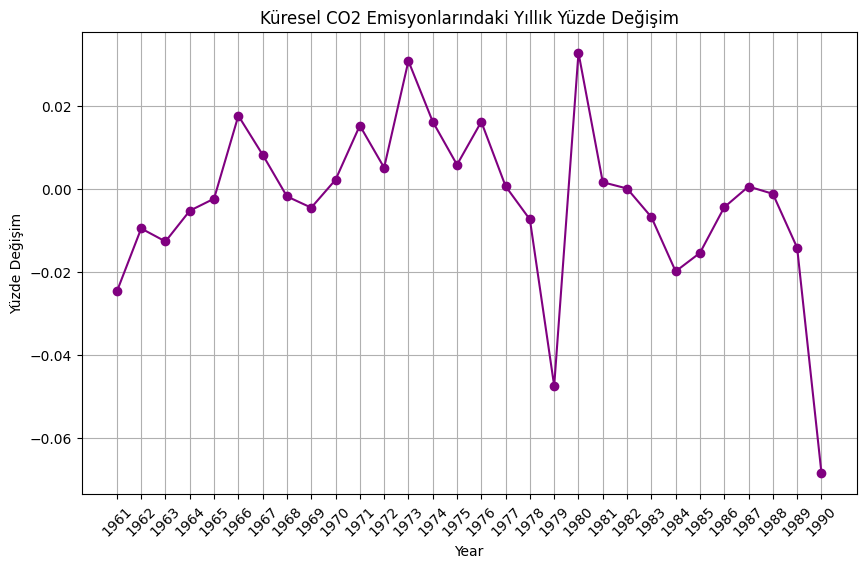

In [67]:
# Yıllık ortalama değişim
yearly_change = global_emissions.pct_change().dropna()

# Years listesinin ilk değerini çıkararak 30 yıllık veri ile uyumlu hale getiriyoruz
adjusted_years = years[1:len(yearly_change) + 1]  # Yüzde değişime uygun olarak yılları kısaltıyoruz

# Grafiği çizelim
plt.figure(figsize=(10, 6))
plt.plot(adjusted_years, yearly_change, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Yüzde Değişim')
plt.title('Küresel CO2 Emisyonlarındaki Yıllık Yüzde Değişim')
plt.grid(True)
plt.xticks(rotation=45)  # X ekseninde yılları döndürüyoruz
plt.show()



In [71]:
# Zaman serisi formatına geçiş
global_emissions.index = pd.to_datetime(global_emissions.index)  # Yıl bazlı zaman serisi
emissions_series = global_emissions.dropna()

In [73]:
# ARIMA modeli kurulum
model = ARIMA(emissions_series, order=(5, 1, 0))
model_fit = model.fit()

C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [83]:
# Gelecek 10 yıl için tahmin yapalım
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)

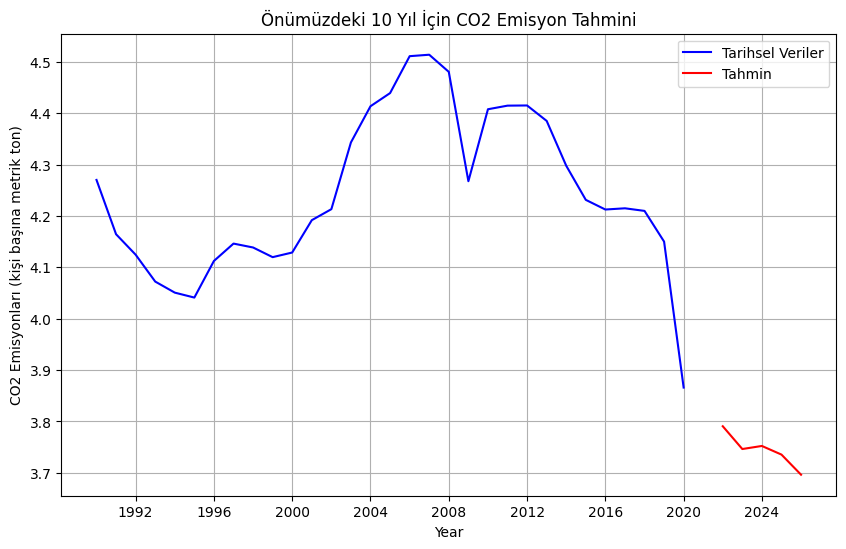

In [85]:
# Tahmin sonuçlarını görselleştirme
forecast_index = pd.date_range(start=emissions_series.index[-1], periods=forecast_years+1, freq='Y')[1:]
plt.figure(figsize=(10, 6))
plt.plot(emissions_series, label='Tarihsel Veriler', color='blue')
plt.plot(forecast_index, forecast, label='Tahmin', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Emisyonları (kişi başına metrik ton)')
plt.title('Önümüzdeki 10 Yıl İçin CO2 Emisyon Tahmini')
plt.legend()
plt.grid(True)
plt.show()